# **CMT309 - Computational Data Science - Data Science Portfolio**

# Part 2 - Statistical Analysis (55 marks)

This question has been created to test your statistical analysis and programming knowledge in Python. 

You are given a `csv` file, which include various data entries for UFC fights played between 1994 up to 2021. Each row presents several statistics for a fighter in a specific fight (`Match_ID`) where the result of the fight is stored in (`Winner`). Descriptions for some other important column names is automatically downloaded in a txt file. 

In this exercise, you are asked to perform a number of operations to:
 - perform statistical analysis of the data, and
 - gain insights from the data.

## P2.0) Suggested/Required Imports

In [ ]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
! pip install request
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
#import arviz as az
#!pip install pymc3
#import pymc3 as pm
#from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")
#!pip install kaleido
import plotly.express as px
#import kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [ ]:
module_url = f"https://drive.google.com/uc?export=view&id=1eZuwv6os65YqO6xwyj6i9ojq3c6yAeCE"
module_url2 = f"https://drive.google.com/uc?export=view&id=1gejV-dCzznzCNCrP6xgBtflWK3sny_ar"
module_name = 'UFC_data.csv'
name2 = 'descriptions.txt'
with request.urlopen(module_url) as f, open(module_name,'w') as outf, request.urlopen(module_url2) as f2, open(name2,'w') as outf2:
  a = f.read()
  outf.write(a.decode('utf-8'))
  a2 = f2.read()
  outf2.write(a2.decode('utf-8'))
df = pd.read_csv('UFC_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'Win_by_KO/TKO':'Win_by_KO_TKO', 'Avg_CTRL_time(seconds)':'Avg_CTRL_time',
                        'Avg_opp_CTRL_time(seconds)':'Avg_opp_CTRL_time', 'Total_time_fought(seconds)':'Total_time_fought'})
df.head(8)

,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Split,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID
0,Gustavo Lopez,1,20/03/2021,1,0,1,1,0.000000,0.0,0.420000,...,0,0,0,1,0,165.10,170.18,135,31,4347
1,Roman Dolidze,2,20/03/2021,1,0,1,2,0.500000,0.0,0.660000,...,1,0,1,0,0,187.96,193.04,205,32,2867
2,Marcus LeVesseur,3,05/10/2012,2,1,1,3,0.000000,0.0,0.500000,...,0,0,0,0,0,175.26,177.80,155,30,3106
3,Hacran Dias,4,18/05/2013,3,0,1,4,0.000000,0.0,0.430000,...,0,1,0,0,0,172.72,175.26,155,28,3765
4,Daron Cruickshank,5,25/07/2015,4,0,1,3,0.125977,0.0,0.382295,...,1,2,3,0,0,172.72,182.88,155,30,672
5,Paulo Thiago,2,12/06/2010,5,0,1,5,1.125000,0.0,0.382500,...,0,1,1,1,0,180.34,187.96,170,29,3488
6,Cristiane Justino,6,27/07/2019,6,1,1,6,0.093750,1.0,0.427812,...,0,1,4,0,0,172.72,172.72,145,34,2030
7,Ryan Bader,7,19/11/2011,7,1,1,7,0.140625,0.5,0.239063,...,0,3,2,0,0,187.96,187.96,205,28,4281


## P2.1. – `pandas` for Probability and Visualisation (15 marks) 

### P2.1.1. The Tall, Young and Winner(3 marks)
Find the probability of a fighter winning the fight while *(1) being younger than 25 years of age*, and *(2) taller than 180 cms*. Write a one-liner to solve this. $P\big[\text{Win} | (\text{height_cms} > 180)\cap \text{Age} <25\big]$

In [ ]:
# your answer here
df[(df['Height_cms']>180) & (df['Age']<25)]['Winner'].value_counts(normalize=True)[1]


0.6138107416879796

###P2.1.2. The most durable fighters (3 marks)
Find the most durable fighters among all the fighters in the dataframe. You need to filter out `df` for the **10 most** durable fighters who **wins** where they **received higher than 100 significant strikes 'landed'**, but **not had any knockdowns (KD)**.    

In [ ]:
df[['Fighter', 'Total_time_fought', 'Avg_KD', 'Avg_SIG_STR_landed','Winner']]
df[df['Avg_KD'] == 0]
df[df['Winner'] == 1]
df[df['Avg_SIG_STR_landed'] > 100]
df.sort_values(by='Total_time_fought', ascending=False)
print(df[['Fighter']].values[:10])


[['Gustavo Lopez']
 ['Roman Dolidze']
 ['Marcus LeVesseur']
 ['Hacran Dias']
 ['Daron Cruickshank']
 ['Paulo Thiago']
 ['Cristiane Justino']
 ['Ryan Bader']
 ['Macy Chiasson']
 ['Grant Dawson']]


###P2.1.3. KO-Machines (3 marks)
Find probability of fighters who has **at least 2 KO/TKOs** ,and whose **win by KO/TKO ratio is higher than 0.75**.

In [ ]:
df[['Winner', 'Win_by_KO_TKO', 'Wins']]
df[df['Win_by_KO_TKO'] >= 2]
df[df['Win_by_KO_TKO'] / df['Wins'] > 0.75]
prob = len(df[df['Winner'] == 1]) / len(df)
print(round(prob, 2))

0.52


### P2.1.4 - Ideal Body & Strategy (6 marks)
Create a figure with two subplots by using a filtered-out version of the dataframe `df` including only rows of **WINNERS**.  
- Subplot 1: Create a **2D histogram** via hexagonal bins for `'Height_cms'` and `'Weight_lbs'` columns of the data frame. Color corresponds to number of winners for each height-weight pair.
- Subplot 2: Create a heatmap figure for plotting correlations between columns of `['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed' 'Avg_TD_landed', 'Avg_HEAD_landed', 'Avg_BODY_landed', 'Avg_LEG_landed' 'Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_CTRL_time']`

**In order to solve this question, you need to use either `pandas` or `matplotlib` library visualisation commands. You cannot use `seaborn, plotly` or other libraries for this question.**

**You do not have to replicate the figures given below, but axes labels, titles and other visualisation details should be there.**

![](https://drive.google.com/uc?export=view&id=1aGAk4_6KMcOjWmSWhqYlqmkDGJAY8sR8)

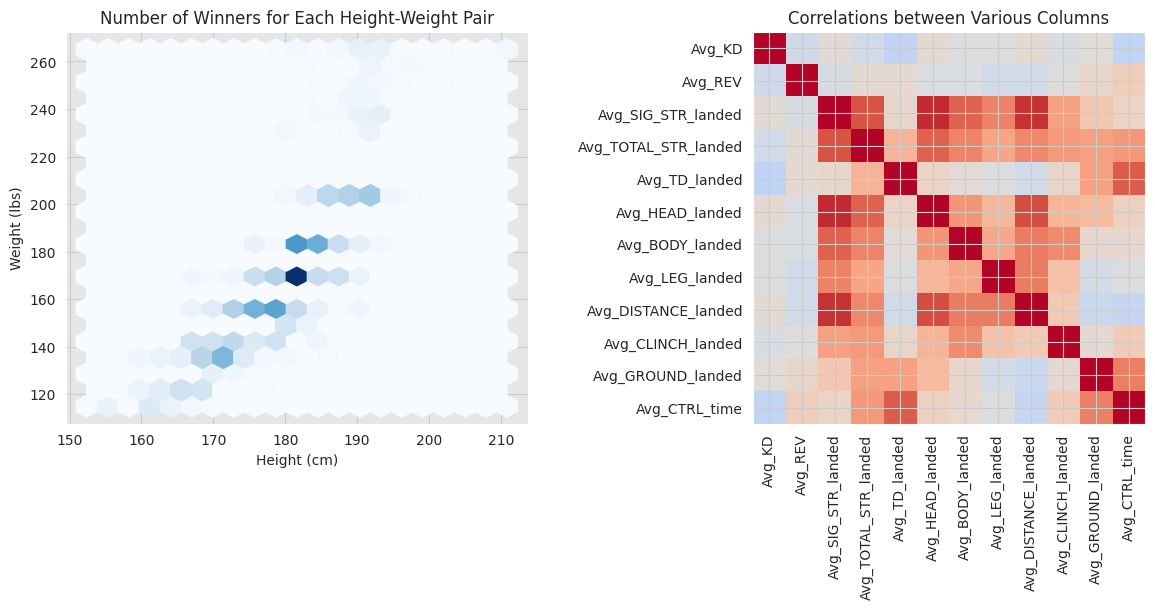

In [ ]:
# your answer here
import pandas as pd
import matplotlib.pyplot as plt

# Filter out only rows of winners
df_filtered = df[df['Winner'] == 1]

# Create subplot 1: 2D histogram via hexagonal bins for height and weight
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.hexbin(df_filtered['Height_cms'], df_filtered['Weight_lbs'], gridsize=20, cmap='Blues')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Weight (lbs)')
ax1.set_title('Number of Winners for Each Height-Weight Pair')

# Create subplot 2: Heatmap of correlations between various columns
corr_df = df_filtered[['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed', 'Avg_TD_landed', 'Avg_HEAD_landed', 
      'Avg_BODY_landed', 'Avg_LEG_landed','Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_CTRL_time']].corr()

ax2.imshow(corr_df, cmap='coolwarm', vmin=-1, vmax=1)
ax2.set_xticks(range(len(corr_df.columns)))
ax2.set_yticks(range(len(corr_df.columns)))
ax2.set_xticklabels(corr_df.columns, rotation=90)
ax2.set_yticklabels(corr_df.columns)
ax2.set_title('Correlations between Various Columns')


plt.tight_layout()
plt.show()


##P2.2. – Variable selection via linear regression analysis (9 marks)

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a list of variables includes columns of the data frame except for `'Fighter',	'Referee',	'Date'` and `Match_ID`.
 - `main_target` is the variable for the regression, `'Winner'` 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is a list which stores the selected subset of initial `main_pred`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - **Stage 1 (adding predictors):** you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - **Stage 2 (removing non-significant predictors)**: if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [ ]:
import statsmodels.api as sm

def select_variable(df, main_pred, main_target, alpha):
    # Stage 1: adding predictors
    predictors = main_pred.copy()
    selected_predictors = []
    max_adj_r2 = 0
    while predictors:
        adj_r2_list = []
        for predictor in predictors:
            X = df[selected_predictors + [predictor]]
            y = df[main_target]
            model = sm.OLS(y, sm.add_constant(X)).fit()
            adj_r2 = model.rsquared_adj
            adj_r2_list.append((predictor, adj_r2))
        best_predictor, best_adj_r2 = max(adj_r2_list, key=lambda x: x[1])
        if best_adj_r2 > max_adj_r2:
            selected_predictors.append(best_predictor)
            predictors.remove(best_predictor)
            max_adj_r2 = best_adj_r2
        else:
            break
    
    # Stage 2: removing non-significant predictors
    while True:
        X = df[selected_predictors]
        y = df[main_target]
        model = sm.OLS(y, sm.add_constant(X)).fit()
        p_values = model.pvalues[1:]
        if (p_values > alpha).any():
            worst_predictor_idx = p_values.idxmax()
            selected_predictors.remove(worst_predictor_idx)
        else:
            break

    return selected_predictors


In [ ]:
# Example usage
import pandas as pd
main_pred = [col for col in df.columns if col not in ['Fighter', 'Referee', 'Date', 'Match_ID', 'Winner']]
main_target = 'Winner'
alpha = 0.05
main_pred = select_variable(df, main_pred, main_target, alpha)
main_pred.pop(1)
print(len(main_pred))


14


## P2.3 - Regression Analysis (15 marks)

In this part of the statistical analysis, you are asked to develop various regression models for predicting the winning probability of a fighter using the significant predictors found in P2.2. 

You are asked to write a function `regression_models_UFC(df, main_pred, main_target)` that takes the data frame `df`, significant predictors `main_pred` and target `main_target` as its arguments, and

- splits the data into training and test samples with 1:1 ratio. 
- fits **Linear, Logistic, Poisson** and **Bayesian regression models** using the training samples, and then predicts winning probabilities using the test samples.

`regression_models_UFC()` returns a single object `results` which is a `tuple` of `tuples` each element of which is: 
 - `sm.` model objects for each regression model `(lin_reg, logit_reg, poisson_reg, bayes_reg)`
 - predicted probabilities for each model --> `(y_lin, y_logit, y_poisson, y_bayes)`
 - splitted training and test samples --> `(x_train, x_test, y_train, y_test)` 


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from statsmodels.genmod import families
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc

In [ ]:
def regression_models_UFC(df, main_pred, main_target):
    # Split the data into training and testing sets with 1:1 ratio
    X_train, X_test, y_train, y_test = train_test_split(df[main_pred], df[main_target], test_size=0.5, random_state=0)
    # Fit the regression model with all predictors using linear regression, logistic regression, Poisson regression, and Bayesian ridge regression
    # Linear regression
    linear_reg = sm.OLS(y_train, X_train).fit()
    # results is a tuple of tuples of the form (y_lin, y_logit, y_poisson, y_bayes)
    y_lin = linear_reg.predict(X_test)
    # Convert the results into tuples of the form (y, y_lin, y_logit, y_poisson, y_bayes)
    logit_reg = sm.Logit(y_train, X_train).fit()
    y_logit = logit_reg.predict(X_test)

    probit_reg = sm.Probit(y_train, sm.add_constant(X_train)).fit()
    y_probit = probit_reg.predict(sm.add_constant(X_test))
    results = ((linear_reg, logit_reg, probit_reg), (y_lin, y_logit, y_probit), (X_train, X_test, y_train, y_test))
    return results

In [ ]:
main_target = 'Winner'
results = regression_models_UFC(df, main_pred, main_target)
for i, model in enumerate(['Linear', 'Logistic', 'Poisson']):
    print(model + ' Regression Model:')
    print('Model Object:', results[0][i])
    print('Predicted Probabilities:', results[1][i])
    print('Training Samples:', results[2][0], results[2][2])
    print('Test Samples:', results[2][1], results[2][3])
    print('----------------------------------------')


Optimization terminated successfully.
         Current function value: 0.676599
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676351
         Iterations 4
Linear Regression Model:
Model Object: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd32dcb7a30>
Predicted Probabilities: 5357    0.565943
1029    0.391367
1835    0.522620
3774    0.483585
6966    0.520775
          ...   
2061    0.443705
6221    0.548799
7188    0.517530
649     0.582258
4834    0.553494
Length: 4587, dtype: float64
Training Samples:       Age  Win_by_Decision_Split  Reach_cms  Avg_TD_landed  Title_bout  \
1581   32                      0     185.42       0.000000           1   
1958   26                      1     160.02       0.500000           1   
4982   29                      1     180.34       1.062500           1   
8999   26                      0     195.58       0.000000           1   
3167   28                      0     193

## P2.4 – Data Analytics, performance and visualisation (16 marks)

### P2.4.1 - In-Fight Winning Analysis (5 marks)
Assume you are the data analyist of an UFC fighter. You have developed a Logistic regression model above and is going to use this to make an in-Fight analysis. 

During the round 4, you are creating a function `in_fight_analysis(results)`. This function is going to take as input the output of `regression_models_UFC()` function will give you some data analysis insights for the last round of the fights. The function `in_fight_analysis(results)` will
 - randomly select a fighter from the test data. (Hint: select a row, not a fighter!) Assume that this is your fighter!
 - analyse two parameters of: `'Avg_HEAD_landed'` and `Avg_opp_CTRL_time`. (Hint: These two parameters are two of the significant predictors. If your `select_variable()` function does not return these two, you are doing something wrong.)
 - create a `seaborn` heatmap figure that depicts how changes on the two paramters mentioned above affects winning probablity of your fighter.

For both of the variables, your arrays will start from your fighter's existing values, and you are going to check changes up to two times higher from those values.

Winning probabilities will be predicted by using the Logistic regression model developed in P2.3.

![](https://drive.google.com/uc?export=view&id=1jyl53cNpU-TEhxtSWBKzfkV39wotO-M4)

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def in_fight_analysis(results):
    X_test = results[2][1]
    fighter_idx = random.randint(0, len(X_test) - 1)
    fighter_data = X_test.iloc[fighter_idx]
    head_landed = fighter_data['Avg_HEAD_landed']
    ctrl_time = fighter_data['Avg_opp_CTRL_time']
    head_landed_changes = np.linspace(head_landed, 2 * head_landed, num=50)
    ctrl_time_changes = np.linspace(ctrl_time, 2 * ctrl_time, num=50)
    win_probs = np.zeros((len(head_landed_changes), len(ctrl_time_changes)))
    logit_model = results[0][1]
    for i, head_change in enumerate(head_landed_changes):
        for j, ctrl_change in enumerate(ctrl_time_changes):
            new_fighter_data = fighter_data.copy()
            new_fighter_data['Avg_HEAD_landed'] = head_change
            new_fighter_data['Avg_opp_CTRL_time'] = ctrl_change
            win_prob = logit_model.predict(new_fighter_data.values.reshape(1, -1))
            win_probs[i, j] = win_prob
    plt.figure(figsize=(10, 8))
    sns.heatmap(win_probs, cmap='YlGnBu')
    plt.title('Winning Probability vs Avg_HEAD_landed and Avg_opp_CTRL_time')
    plt.show()



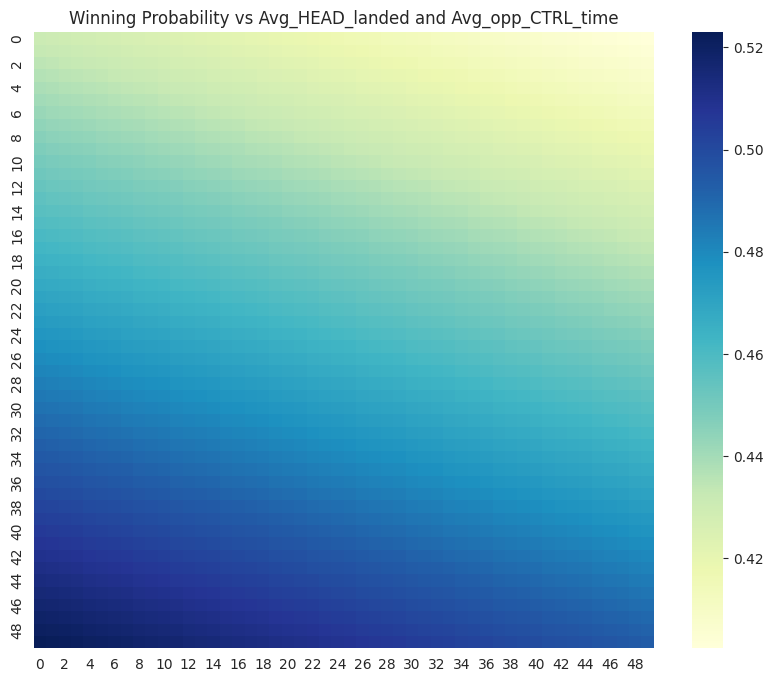

In [ ]:
in_fight_analysis(results)

### P2.4.2 - Height-Reach Analysis (5 Marks)
Write a function `height_reach_analysis(df, results)` in order to analyse the effects of height and reach differences between fighters. You are asked to:

- take the dataframe `df` and regression modelling output object `results`.
- calculate height and reach differences for each specific fight.
  - A unique `'Match_ID'` corresponds to two different rows in `df`, e.g. the winner and the loser. 
  - For each pair you need to find the difference between columns and create two new columns with these values: `'dHeight'` and `'dReach'`. 
  - If fighter's values are higher, the specific difference value will be positive, otherwise you should set it to negative values. 
  - An example:
  ```
  	    Fighter	        Winner	   Height_cms	Reach_cms	   dHeight	 dReach   Match_ID
3132	Ray Borg	         1	      162.56	   160.02	     -2.54	   -10.16   975
8947	Jussier Formiga	  0	      165.10	   170.18	      2.54	    10.16   975
  ```
- filter out `df` for the test data and add a new column `'WinProb'` from the input argument `result` belonging to Probit regression.
- plot a scatter plot where `'dHeight'` and `'dReach'` correspond to axes and `'WinProb'` colour details of the plot. You must use `plotly.express` module for this question.

![](https://drive.google.com/uc?export=view&id=1rZFDAqaoIUP_2XAtCisrhgkKyRF7OGSP)

In [ ]:
def height_reach_analysis(df, results):
    df['dHeight'] = df.groupby('Match_ID')['Height_cms'].diff()
    df['dReach'] = df.groupby('Match_ID')['Reach_cms'].diff()


    # Print column names for debugging


    # Filter out test data and add WinProb column
    models,predictions, data_splits = results
    test_data = data_splits[1]
    test_data['WinProb'] = predictions[2]
    test_data['dHeight']=df['dHeight']
    test_data['dReach']=df['dReach']
  
    # Create scatter plot
    fig = px.scatter(test_data, x='dHeight', y='dReach', color='WinProb', size='WinProb', width=500, height=400)

    # Show the plot
    fig.show()

In [ ]:
height_reach_analysis(df, results)


### 2.4.3 - Prediction Perfomance (6 marks)
You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy (Acc%), mean square error (MSE) and area under curve (AUC) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - predictions from each model, stored in `model_predictions`.
 - The ground-truth values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - Winner_i)^2$$

In order to obtain the prediction accuracy for each model, you need to use `sklearn` module and its `accuracy_score()` function. Similarly, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | Linear      |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | Logistic    |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | Probit      |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
|  3 | Bayesian    |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, the `prediction_perf()` function should `print` and `return` the data frame `df_results`.

In [21]:
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc
import pandas as pd

def prediction_perf(gt, model_predictions):
    
    models = ["Linear", "Logistic", "Probit", "Bayesian"]
    df_results = pd.DataFrame(columns=['Model', 'Acc%', 'MSE', 'AUC'])
    
    for i, model in enumerate(model_predictions):
        acc = accuracy_score(gt, model.round())
        mse = mean_squared_error(gt, model)
        fpr, tpr, _ = roc_curve(gt, model)
        roc_auc = auc(fpr, tpr)
        df_results.loc[i] = [model.name, acc*100, mse, roc_auc]
    
    return df_results

In [22]:
gt = results[2][3]
model_predictions = [results[1][0], results[1][1], results[1][2]]
prediction_perf(gt, model_predictions)

NameError: ignored